In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Linux
oural
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [21]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.field.multi_instruments as multi
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.phone.analyse as analyse

import icewave.field.multi_instruments as multi

import phonefleet.connect as connect
import phonefleet.data as dataphone

import icewave.phone.pipeline as pl
import icewave.field.time as timest


In [11]:
date = '0211'
phonelist = pl.get_phonelist(date)

/media/turbots/BlueDisk/Shack25_local/Data/
Found 30 phone folders : 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 28, 17, 25, 26, 27, 31, 32, 35, 18, 19, 21, 22, 23, 24]


In [13]:
files = pl.get_filelist(date)

/media/turbots/BlueDisk/Shack25_local/Data/
Found 30 phone folders : 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 28, 17, 25, 26, 27, 31, 32, 35, 18, 19, 21, 22, 23, 24]
/media/turbots/BlueDisk/Shack25_local/Data/


In [28]:
nums = list(files[17]['gps'].keys())
print(nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/1/2025_02_11_L1_phone1_num11.h5
1 11 ['14:00:26'] ['14:15:12']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/1/2025_02_11_L1_phone1_num12.h5
1 12 ['14:15:12'] ['14:29:58']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/1/2025_02_11_L1_phone1_num13.h5
1 13 ['14:29:58'] ['14:44:44']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/1/2025_02_11_L1_phone1_num14.h5
1 14 ['14:44:44'] ['14:59:30']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/1/2025_02_11_L1_phone1_num15.h5
1 15 ['14:59:30'] ['15:14:17']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/1/2025_02_11_L1_phone1_num16.h5
1 16 ['15:14:17'] ['15:29:03']
/media/turbots/BlueDisk/Shack25_lo

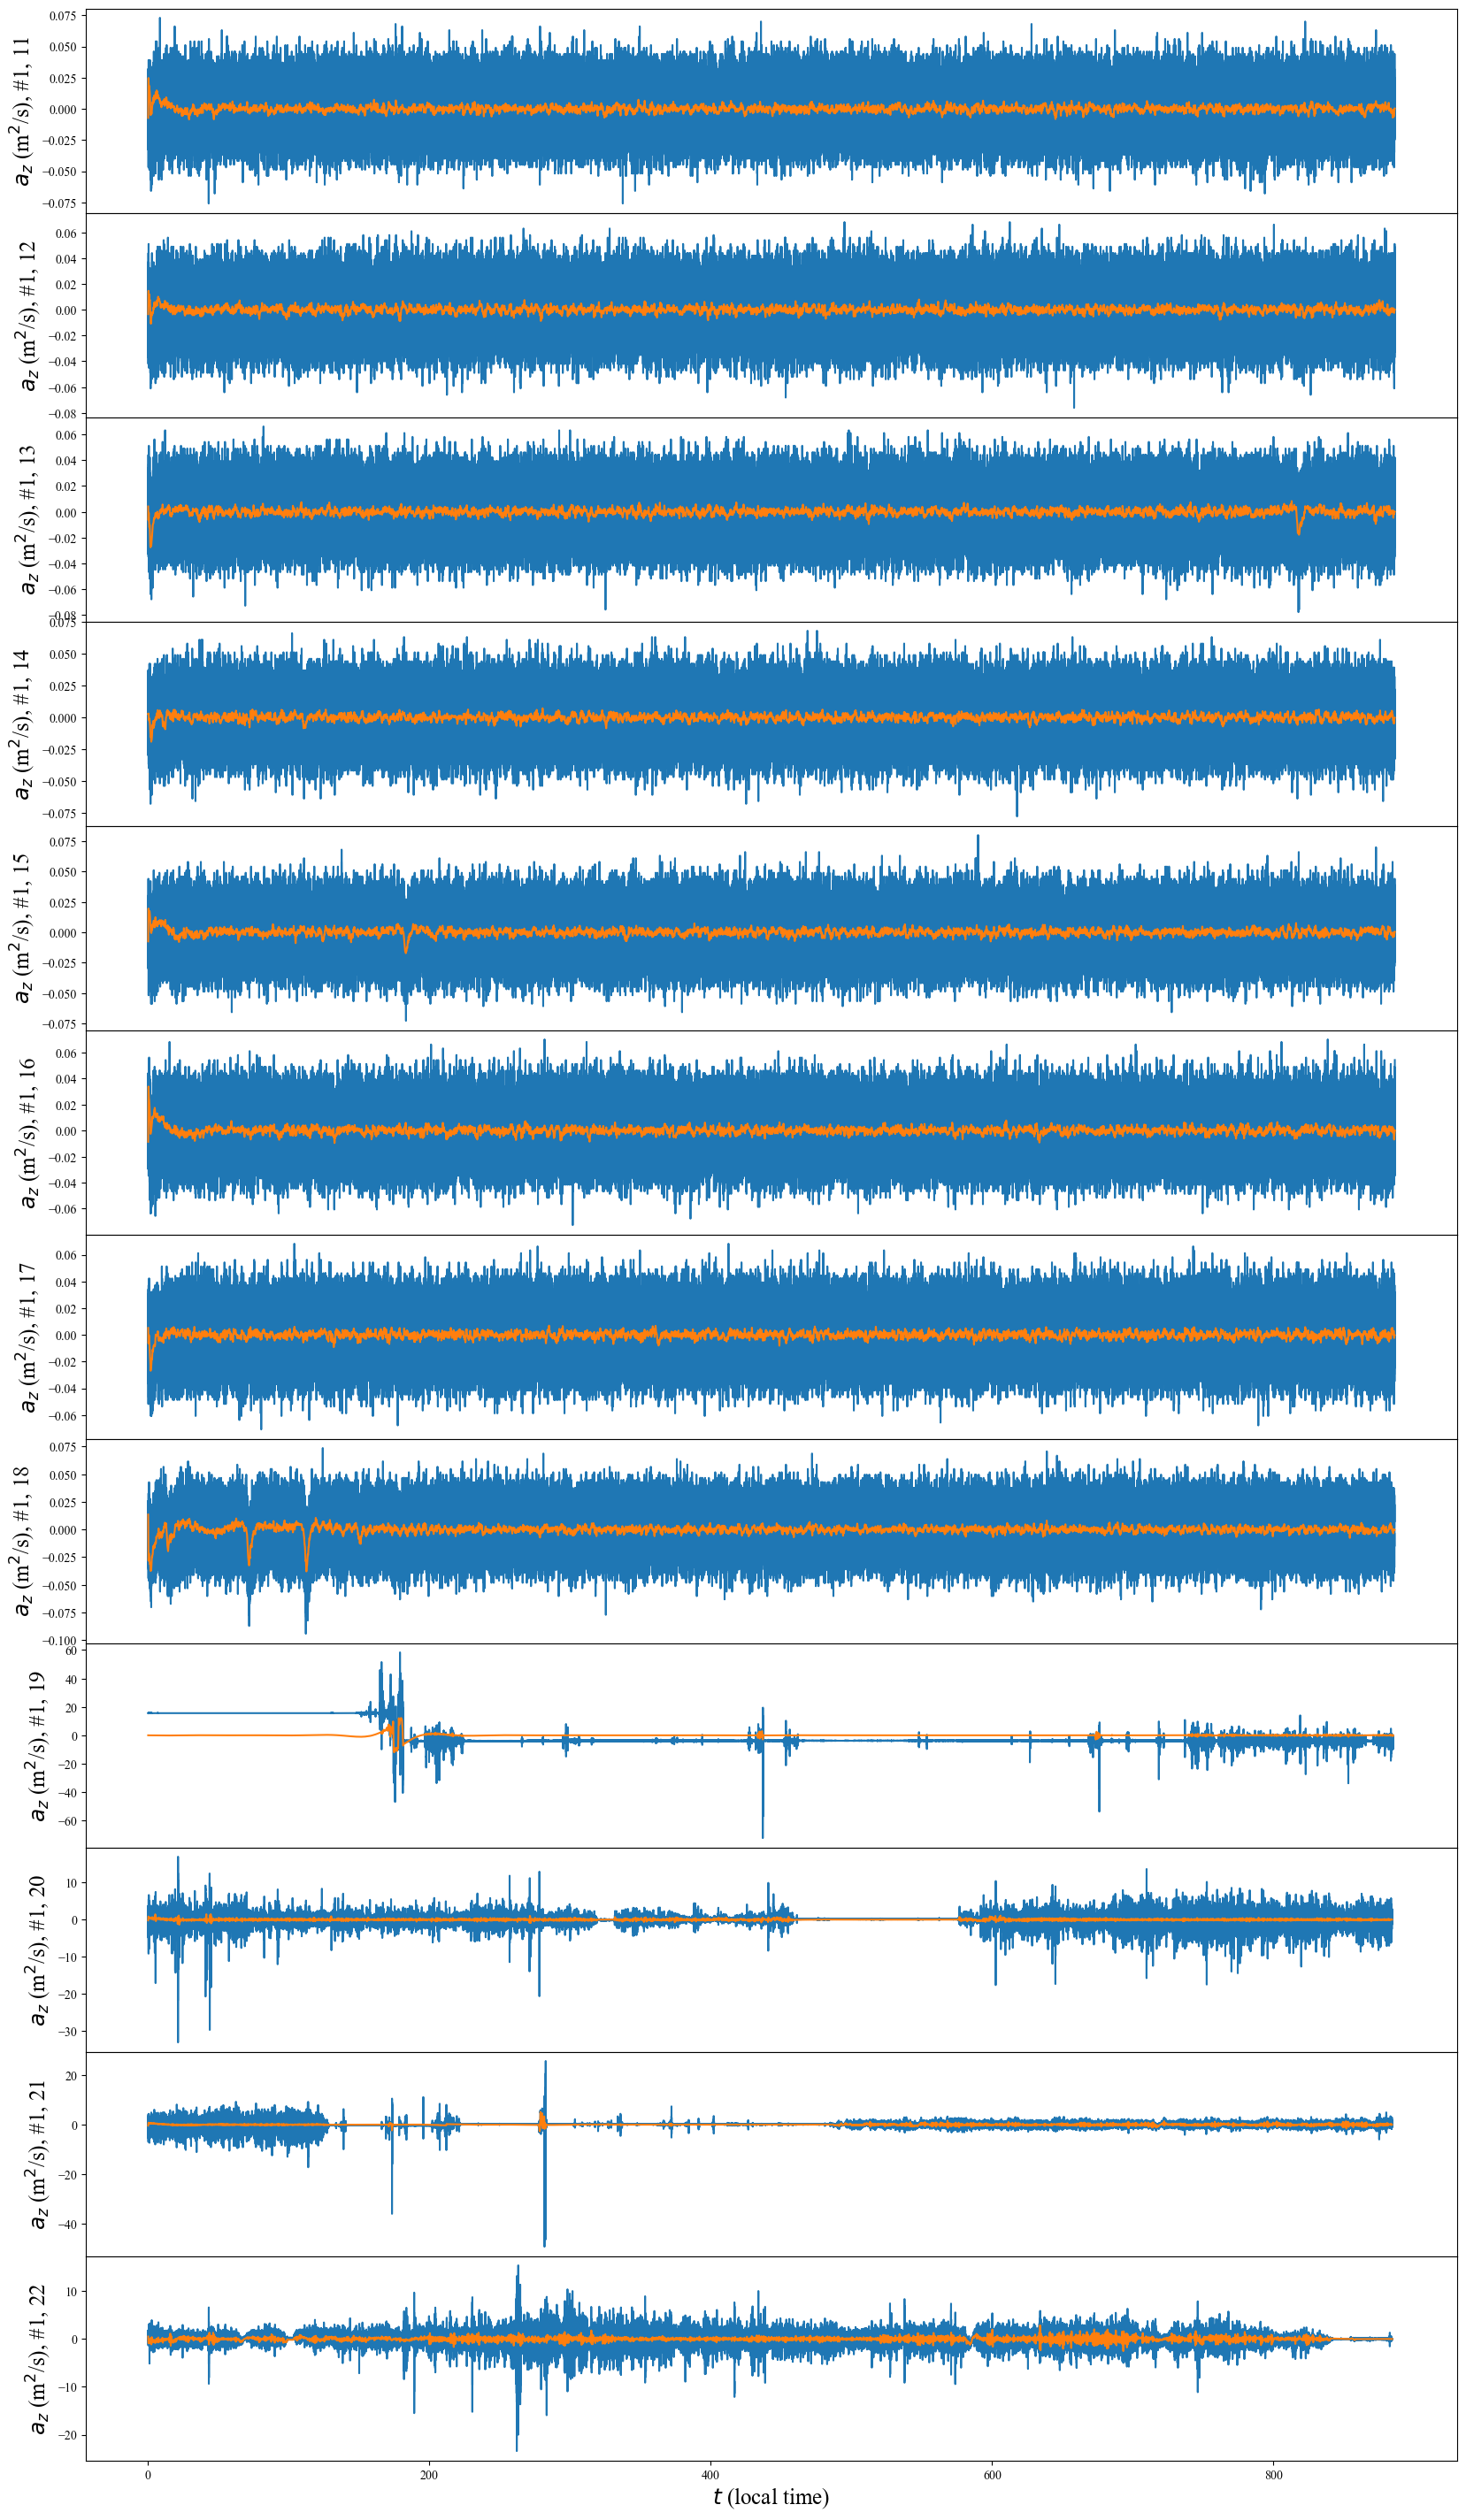

In [27]:
#display the full time serie for a single phone

nummin = 10
nummax = 19
numlist = nums[nummin:]
n = len(numlist)
phone = 1

fig,axs = plt.subplots(figsize=(20,3*n),nrows=n,sharex=True)
 
coord = 'z'
for num,ax in zip(nums,axs):
    if num>=nummin and num<=nummax:
        hf = pl.load_lvl_1(date,phone,num)

        t = list(hf['t_sync'])
        t = timest.today_time(t)
        az = list(hf['a'+coord])

        tmin = timest.display_time([t[0]])
        tmax = timest.display_time([t[-1]])

        print(phone,num, tmin, tmax)

        t = np.asarray(t)
        az = np.asarray(az)
        az = az-np.mean(az)
        t = t-t[0]


        ax.plot(t,az)

        y_high,y_wave,y_trend,err = analyse.filtering(az,fc=0.01,flow=0.0001) #filter between 0.04Hz and 4Hz

        ax.plot(t,y_wave)
        graphes.legende('',f'$a_{coord}$ (m$^2$/s), #{phone}, {num}','',ax=ax)

fig.subplots_adjust(hspace=0)

figs = graphes.legende('$t$ (local time)',f'$a_{coord}$ (m$^2$/s), #{phone}, {num}','',ax=ax)
#graphes.save_figs(figs,savedir=savefolder,prefix='TimeSignal_phone{phone}_num{nummin}_',overwrite=True)


/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/17/2025_02_11_L1_phone17_num13.h5
17 13 ['14:29:33'] ['14:44:15']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/17/2025_02_11_L1_phone17_num14.h5
17 14 ['14:44:15'] ['14:58:58']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/17/2025_02_11_L1_phone17_num15.h5
17 15 ['14:58:58'] ['15:13:41']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/17/2025_02_11_L1_phone17_num16.h5
17 16 ['15:13:41'] ['15:28:24']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/17/2025_02_11_L1_phone17_num17.h5
17 17 ['15:28:24'] ['15:43:07']
/media/turbots/BlueDisk/Shack25_local/Data/
/media/turbots/BlueDisk/Shack25_local/Data/0211/Phone/17/2025_02_11_L1_phone17_num18.h5
17 18 ['15:43:07'] ['15:57:50']
/media/turbots/B

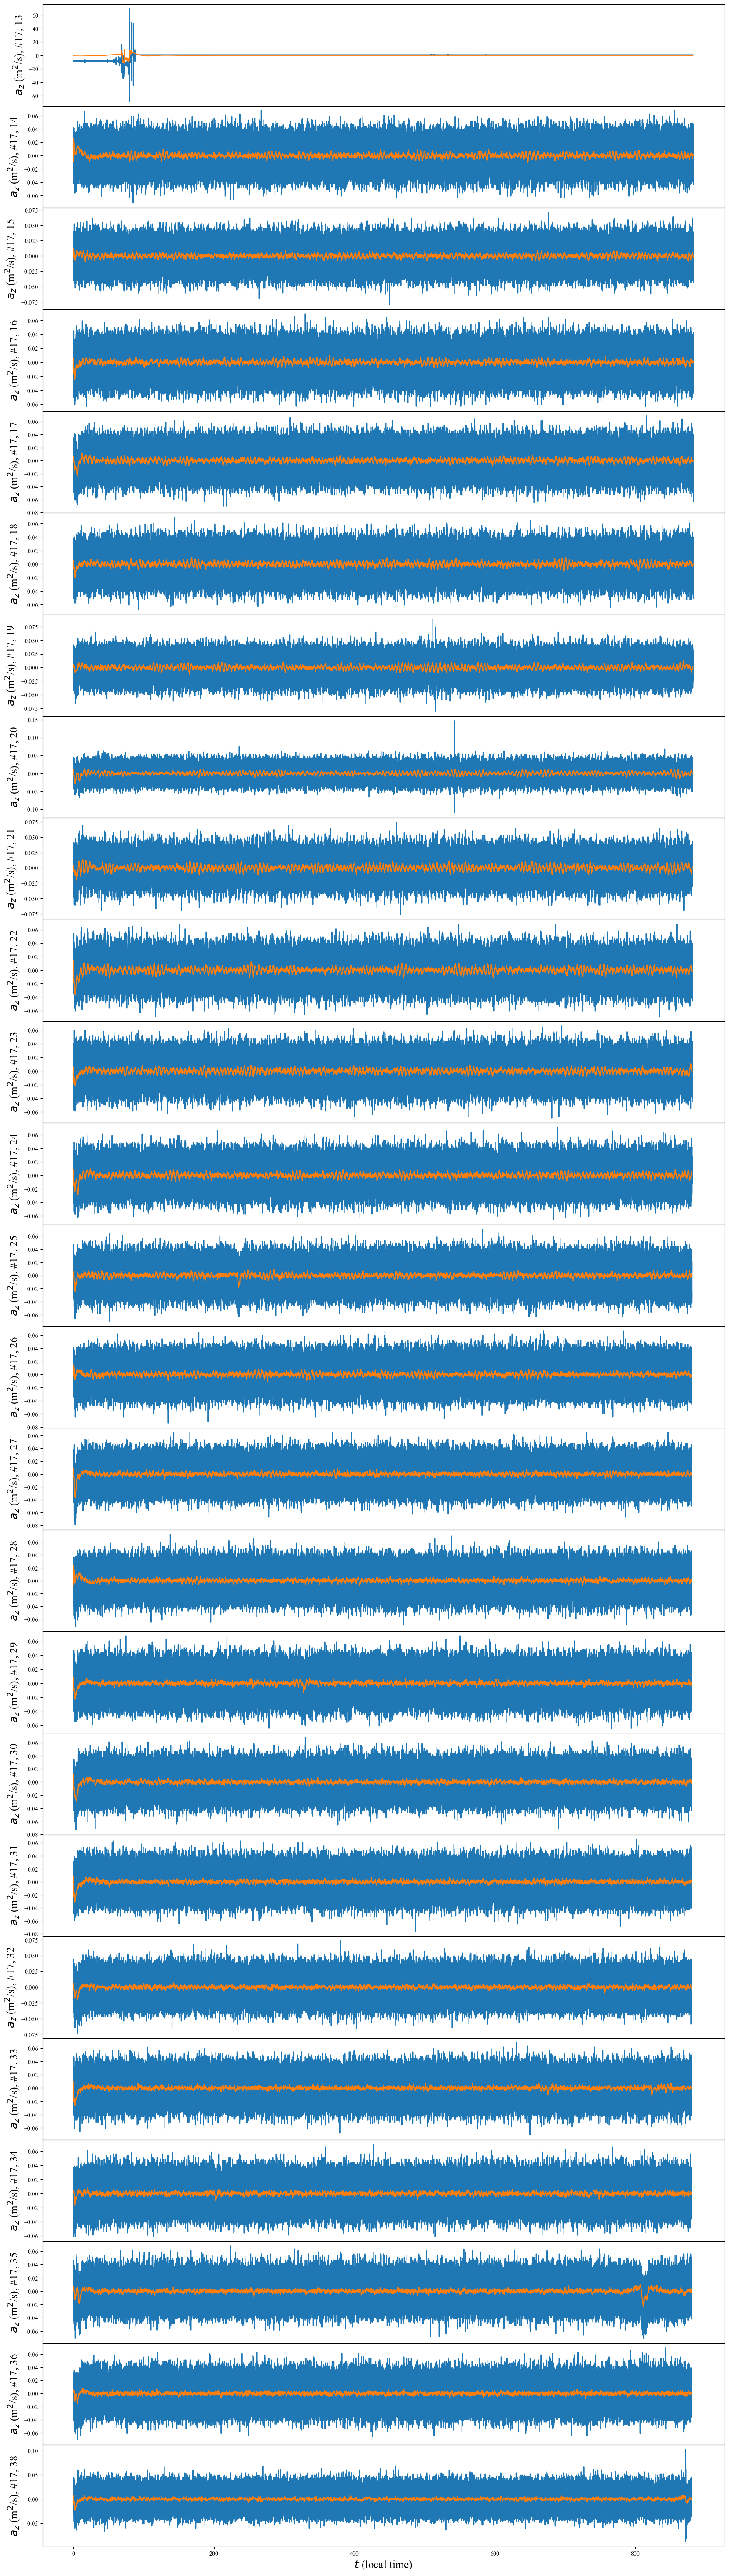

In [31]:
#display the full time serie for a single phone

nummin = 13
nummax = 37
numlist = nums[nummin:]
n = nummax-nummin+1
phone = 17

fig,axs = plt.subplots(figsize=(20,3*n),nrows=n,sharex=True)
 
coord = 'z'
for num in nums:
    if num>=nummin and num<=nummax:
        ax = axs[num-nummin]
        hf = pl.load_lvl_1(date,phone,num)

        t = list(hf['t_sync'])
        t = timest.today_time(t)
        az = list(hf['a'+coord])

        tmin = timest.display_time([t[0]])
        tmax = timest.display_time([t[-1]])

        print(phone,num, tmin, tmax)

        t = np.asarray(t)
        az = np.asarray(az)
        az = az-np.mean(az)
        t = t-t[0]


        ax.plot(t,az)

        y_high,y_wave,y_trend,err = analyse.filtering(az,fc=0.01,flow=0.0001) #filter between 0.04Hz and 4Hz

        ax.plot(t,y_wave)
        graphes.legende('',f'$a_{coord}$ (m$^2$/s), #{phone}, {num}','',ax=ax)

fig.subplots_adjust(hspace=0)

figs = graphes.legende('$t$ (local time)',f'$a_{coord}$ (m$^2$/s), #{phone}, {num}','',ax=ax)
#graphes.save_figs(figs,savedir=savefolder,prefix='TimeSignal_phone{phone}_num{nummin}_',overwrite=True)
